In [64]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
import joblib



sns.set(rc={'figure.figsize': [15,8]}, font_scale=1.2)
sns.set_style('whitegrid') 

# About Our Data
| Column Name           | Description |
|-----------------------|-------------|
| User_Id               | Unique identifier for each user. |
| Customer_Age          | Age of the customer (Number of days since their last transaction). |
| Trx_Vlu               | Value of the transaction in currency units. |
| Trx_Age               | Age of the transaction (Number of days since transaction). |
| Trx_Rank              | Rank or sequence number of the transaction. |
| Points                | Points earned from the transaction. |
| Category In English   | Category of the transaction (e.g., Fashion, F&B, Grocery, Transportation, Other). |
| Mer_Id                | Identifier for the merchant associated with the transaction. |


# Data Exploration 

In [3]:
df=pd.read_csv("../Data/raw/Cleaned_Data_Merchant_Level_2.csv")
df

User_Id  Customer_Age  Trx_Vlu  Trx_Age  Trx_Rank  Points  \
0        21053           362   2014.0      362         1   20140   
1        26472           368   1120.0      371         1   11200   
2        26472           368    850.0      368         2    8500   
3        27075            34    198.0      558         1    1980   
4        27417           413    240.0      413         1    2400   
...        ...           ...      ...      ...       ...     ...   
43667    26865            27    305.0       27         1    3050   
43668    27128            31    312.0       31         1    3120   
43669    28814            25    120.0       25         1    1200   
43670    29107             2      2.0        2         1      20   
43671    29107             2      2.0        2         2      20   

      Category In English  Mer_Id  
0                 Fashion       0  
1                 Fashion       0  
2                 Fashion       0  
3                 Fashion       0  
4                 Fashion       0  
...                   ...     ...  
43667                 F&B      55  
43668                 F&B      55  
43669                 F&B      55  
43670               Other      56  
43671               Other      56  

[43672 rows x 8 columns]

In [4]:
df.head(30)

User_Id  Customer_Age  Trx_Vlu  Trx_Age  Trx_Rank  Points  \
0     21053           362   2014.0      362         1   20140   
1     26472           368   1120.0      371         1   11200   
2     26472           368    850.0      368         2    8500   
3     27075            34    198.0      558         1    1980   
4     27417           413    240.0      413         1    2400   
5      1447            34   1674.0       34         1   16740   
6      2709            33    582.0       33         1    5820   
7      3303           233    472.4      233         1    4724   
8      7026            14    156.5       14         1    1565   
9     10231            27    416.5       27         1    4165   
10    10975            47    949.1       47         1    9491   
11    13519             1      2.0       39         1      20   
12    14734            37    350.7       37         1    3507   
13    14823             5    758.0        5         1    7580   
14    16503            55    595.2       55         1    5952   
15    31199           102    200.0      102         1    2000   
16     4594           419    140.0      419         1    1400   
17     7039           306    400.0      306         1    4000   
18    10038           257    120.0      503         1    1200   
19    10038           257    268.0      419         2    2680   
20    10840            13    235.0       13         1    2350   
21    21265           321    720.0      328         1    7200   
22    21265           321   1080.0      321         2   10800   
23    21702           355    170.0      355         1    1700   
24    24999            27      2.0      356         1      20   
25    26257            29    940.0       29         1    9400   
26    26333            41    235.0       41         1    2350   
27    26333            41    470.0       41         2    4700   
28    26437           334    800.0      334         1    8000   
29    26520           262    360.0      262         1    3600   

   Category In English  Mer_Id  
0              Fashion       0  
1              Fashion       0  
2              Fashion       0  
3              Fashion       0  
4              Fashion       0  
5                  F&B       1  
6                  F&B       1  
7                  F&B       1  
8                  F&B       1  
9                  F&B       1  
10                 F&B       1  
11                 F&B       1  
12                 F&B       1  
13                 F&B       1  
14                 F&B       1  
15                 F&B       1  
16               Other       2  
17               Other       2  
18               Other       2  
19               Other       2  
20               Other       2  
21               Other       2  
22               Other       2  
23               Other       2  
24               Other       2  
25               Other       2  
26               Other       2  
27               Other       2  
28               Other       2  
29               Other       2

In [5]:
df.tail(30)

User_Id  Customer_Age  Trx_Vlu  Trx_Age  Trx_Rank  Points  \
43642     6957             7   1104.0        7         1   11040   
43643     7566            20    694.0       20         1    6940   
43644     7677            21    270.0       21         1    2700   
43645     7737            20    514.0       20         1    5140   
43646     7991            23    218.0       23         1    2180   
43647     8837            33    222.0       33         1    2220   
43648     8912            19    262.0       19         1    2620   
43649     9417            10    184.0       10         1    1840   
43650     9488            27    197.0       27         1    1970   
43651     9834            67      2.0       67         1      20   
43652    11877             3    133.5        3         1    1335   
43653    12158            26    180.0       26         1    1800   
43654    13171            32    198.7       32         1    1987   
43655    13519             1     40.0       56         1     400   
43656    13519             1      2.0       56         2      20   
43657    13519             1      2.0       56         4      20   
43658    14238            12    224.0       12         1    2240   
43659    14475            12    172.0       12         1    1720   
43660    16212            20    218.0       20         1    2180   
43661    16310             1    200.0        1         1    2000   
43662    19177            27    163.0       27         1    1630   
43663    19862            33    210.0       33         1    2100   
43664    20060            20    113.0       20         1    1130   
43665    20563             5    550.0       12         1    5500   
43666    20563             5    650.0        5         2    6500   
43667    26865            27    305.0       27         1    3050   
43668    27128            31    312.0       31         1    3120   
43669    28814            25    120.0       25         1    1200   
43670    29107             2      2.0        2         1      20   
43671    29107             2      2.0        2         2      20   

      Category In English  Mer_Id  
43642                 F&B      55  
43643                 F&B      55  
43644                 F&B      55  
43645                 F&B      55  
43646                 F&B      55  
43647                 F&B      55  
43648                 F&B      55  
43649                 F&B      55  
43650                 F&B      55  
43651                 F&B      55  
43652                 F&B      55  
43653                 F&B      55  
43654                 F&B      55  
43655                 F&B      55  
43656                 F&B      55  
43657                 F&B      55  
43658                 F&B      55  
43659                 F&B      55  
43660                 F&B      55  
43661                 F&B      55  
43662                 F&B      55  
43663                 F&B      55  
43664                 F&B      55  
43665                 F&B      55  
43666                 F&B      55  
43667                 F&B      55  
43668                 F&B      55  
43669                 F&B      55  
43670               Other      56  
43671               Other      56

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_Id              43672 non-null  int64  
 1   Customer_Age         43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Trx_Rank             43672 non-null  int64  
 5   Points               43672 non-null  int64  
 6   Category In English  43672 non-null  object 
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


# Data Cleaning and more Exploration

In [7]:
df.isna().sum()

User_Id                0
Customer_Age           0
Trx_Vlu                0
Trx_Age                0
Trx_Rank               0
Points                 0
Category In English    0
Mer_Id                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
pd.set_option('display.max_colwidth', None)

for col in df.columns:
    if df[col].dtype == 'object':
       print(f"The number of unique values of '{col}' are: {df[col].nunique()}")
       print(f"The unique values are: {list(df[col].unique())}")
       print('*'*100)
    else:
       print(f"The number of unique values of '{col}' are: {df[col].nunique()}")
       print("An example of the unique values are: ", df[col].unique()[:4].tolist())
       print('*'*100)




     

The number of unique values of 'User_Id' are: 33457
An example of the unique values are:  [21053, 26472, 27075, 27417]
****************************************************************************************************
The number of unique values of 'Customer_Age' are: 527
An example of the unique values are:  [362, 368, 34, 413]
****************************************************************************************************
The number of unique values of 'Trx_Vlu' are: 5911
An example of the unique values are:  [2014.0, 1120.0, 850.0, 198.0]
****************************************************************************************************
The number of unique values of 'Trx_Age' are: 573
An example of the unique values are:  [362, 371, 368, 558]
****************************************************************************************************
The number of unique values of 'Trx_Rank' are: 17
An example of the unique values are:  [1, 2, 3, 4]
**********************************

## Numerical Values

In [10]:
df.describe().T


count          mean          std   min      25%       50%  \
User_Id       43672.0  17173.411889  9665.399084   0.0  8710.75  17561.00   
Customer_Age  43672.0    144.027844   114.764448   1.0    34.00    115.00   
Trx_Vlu       43672.0    331.224975   575.637414   2.0   122.00    189.35   
Trx_Age       43672.0    185.186664   121.989540   1.0    62.00    203.00   
Trx_Rank      43672.0      1.265227     0.776549   1.0     1.00      1.00   
Points        43672.0   3312.249748  5756.374137  20.0  1220.00   1893.50   
Mer_Id        43672.0     16.277111    16.099288   0.0     8.00      8.00   

                   75%       max  
User_Id       25634.25   33518.0  
Customer_Age    252.00     682.0  
Trx_Vlu         310.00   26380.0  
Trx_Age         271.00     698.0  
Trx_Rank          1.00      17.0  
Points         3100.00  263800.0  
Mer_Id           26.00      56.0

### Looks like we need to scale all of the columns except the IDs and rank

# Initial EDA 

## 1. Customer Age Distribution (Represents Number of Days since their last transaction/ Recency)

<Axes: xlabel='Customer_Age', ylabel='Count'>

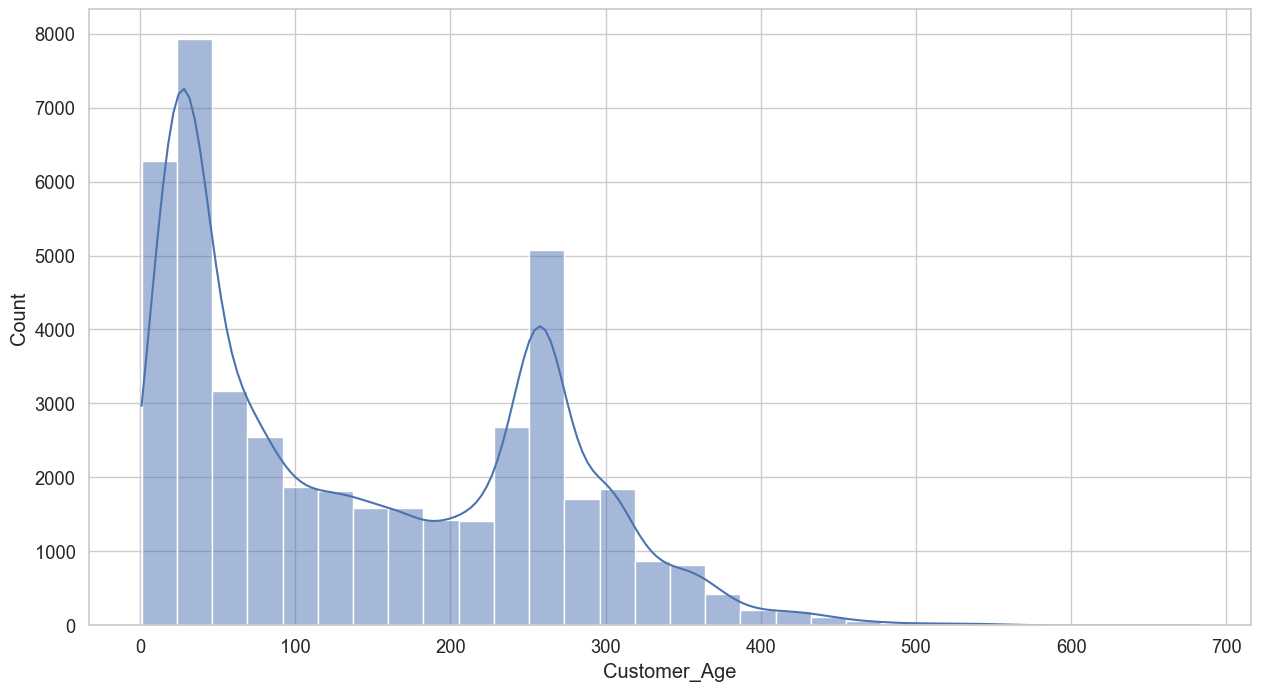

In [11]:
sns.histplot(df, x='Customer_Age', bins=30, kde=True)

## 2. Transaction Value Distribution (Represents the amount of money/ currency spent in a transaction (in currency units))

<Axes: xlabel='Trx_Vlu', ylabel='Count'>

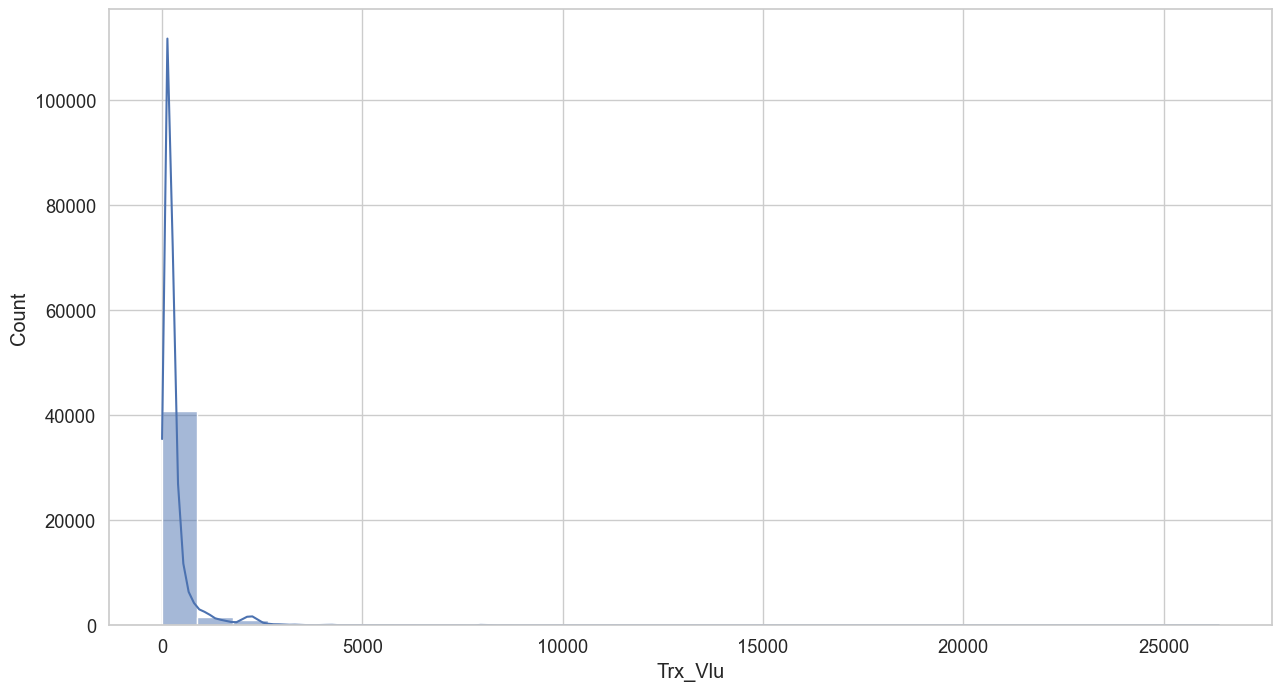

In [12]:
sns.histplot(df, x='Trx_Vlu', bins=30, kde=True)

## 3. Transaction Age Distribution (Represents Number of Days since transaction)

<Axes: xlabel='Trx_Age', ylabel='Count'>

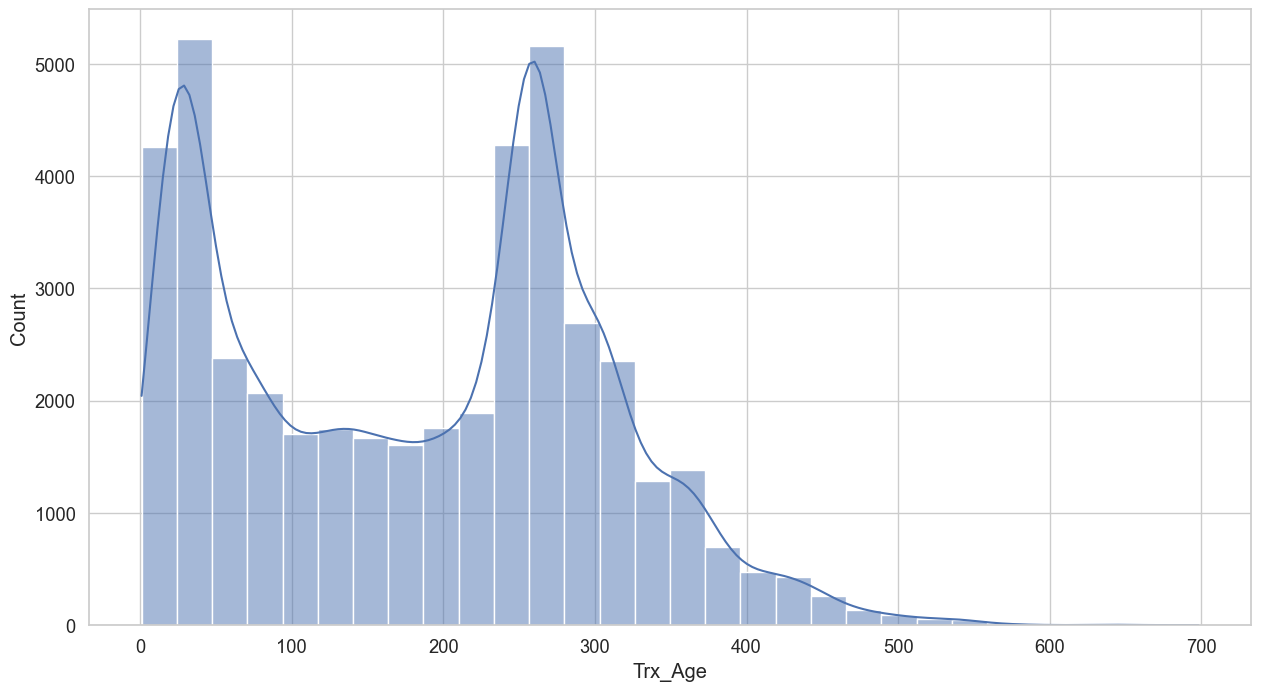

In [13]:
sns.histplot(df, x='Trx_Age', bins=30, kde=True)

## 4. Merchant Category Distribution

In [14]:
df['Category In English'].value_counts()

Category In English
Grocery            30694
F&B                 7720
Fashion             3333
Health & Beauty     1504
Electronics          228
Transportaion        146
Other                 47
Name: count, dtype: int64

<Axes: xlabel='Category In English', ylabel='count'>

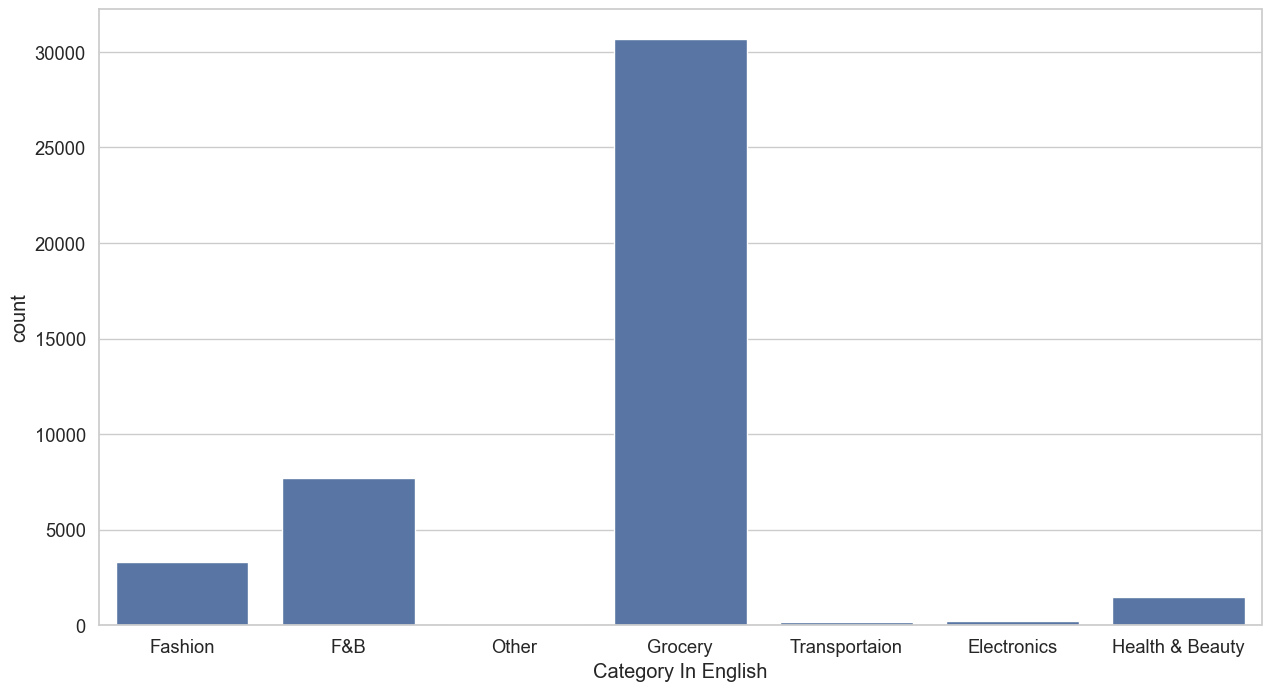

In [15]:
sns.countplot(df, x='Category In English')

## 5. Points Earned Distrubtion

<Axes: xlabel='Points', ylabel='Count'>

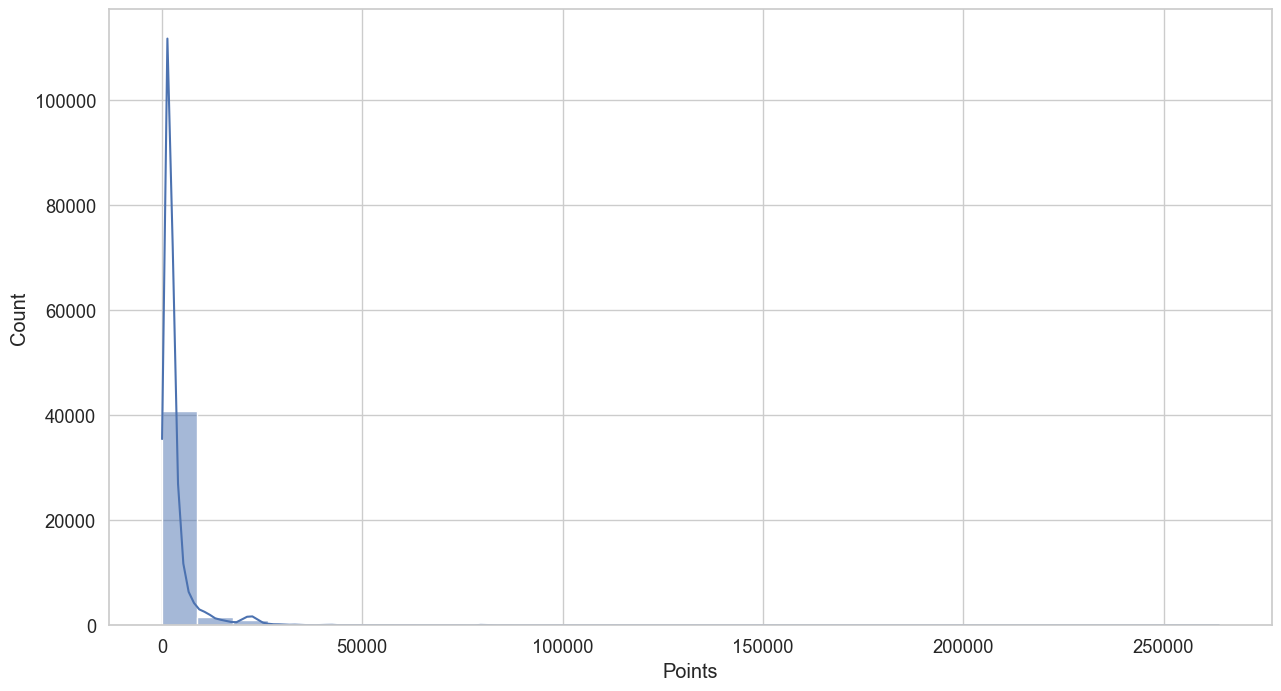

In [16]:
sns.histplot(df, x='Points', bins=30, kde=True)

# ML and Clustering

## Aggregate

### Since we have multiple rows per customer sometimes, we'll aggregate by customer first

In [17]:
# save our original df in case we need it later

raw_df= df.copy()
raw_df

User_Id  Customer_Age  Trx_Vlu  Trx_Age  Trx_Rank  Points  \
0        21053           362   2014.0      362         1   20140   
1        26472           368   1120.0      371         1   11200   
2        26472           368    850.0      368         2    8500   
3        27075            34    198.0      558         1    1980   
4        27417           413    240.0      413         1    2400   
...        ...           ...      ...      ...       ...     ...   
43667    26865            27    305.0       27         1    3050   
43668    27128            31    312.0       31         1    3120   
43669    28814            25    120.0       25         1    1200   
43670    29107             2      2.0        2         1      20   
43671    29107             2      2.0        2         2      20   

      Category In English  Mer_Id  
0                 Fashion       0  
1                 Fashion       0  
2                 Fashion       0  
3                 Fashion       0  
4                 Fashion       0  
...                   ...     ...  
43667                 F&B      55  
43668                 F&B      55  
43669                 F&B      55  
43670               Other      56  
43671               Other      56  

[43672 rows x 8 columns]

In [18]:
# get transactions info per customer
customer_df = df.groupby("User_Id").agg(
    Trx_Count=("Trx_Vlu", "count"),
    Total_Spend=("Trx_Vlu", "sum"),
    Avg_Trx_Value=("Trx_Vlu", "mean"),
    Recency=("Trx_Age", "min"),
    Total_Points=("Points", "sum")).reset_index()

customer_df

User_Id  Trx_Count  Total_Spend  Avg_Trx_Value  Recency  Total_Points
0            0          1        442.7     442.700000      281          4427
1            1          1        249.0     249.000000       34          2490
2            2          1        300.0     300.000000      236          3000
3            3          1        162.0     162.000000      320          1620
4            4          1         70.0      70.000000      407           700
...        ...        ...          ...            ...      ...           ...
33452    33514          3        594.0     198.000000      101          5940
33453    33515          1         48.0      48.000000      244           480
33454    33516          1        132.0     132.000000      256          1320
33455    33517          1        210.0     210.000000       13          2100
33456    33518          3        568.0     189.333333       55          5680

[33457 rows x 6 columns]

### Then we need to know top 4 merchants for each customer so we can reccommend them later

In [19]:
# How much each customer spent on each category 
merchant_df = df.groupby(['User_Id', 'Category In English'])['Trx_Vlu'].sum().reset_index()
merchant_df 


User_Id Category In English  Trx_Vlu
0            0                 F&B    442.7
1            1             Fashion    249.0
2            2                 F&B    300.0
3            3             Fashion    162.0
4            4             Grocery     70.0
...        ...                 ...      ...
35109    33515                 F&B     48.0
35110    33516             Grocery    132.0
35111    33517             Grocery    210.0
35112    33518                 F&B    196.0
35113    33518             Grocery    372.0

[35114 rows x 3 columns]

In [20]:
# sort merchants by rank highest to lowest (smaller number to larger one)
merchant_df_sorted = merchant_df.sort_values(['Trx_Vlu'], ascending=False)
merchant_df_sorted['Rank'] = merchant_df_sorted.groupby('User_Id')['Trx_Vlu'].rank(method='first', ascending=False)
merchant_df_sorted    

User_Id Category In English   Trx_Vlu  Rank
20097    19390         Electronics  133338.0   1.0
3594      3478             Grocery   62970.0   1.0
13087    12650             Grocery   44235.0   1.0
23266    22380             Grocery   34260.3   1.0
8268      8005             Grocery   33778.2   1.0
...        ...                 ...       ...   ...
26042    24999               Other       2.0   3.0
8780      8494               Other       2.0   4.0
8779      8494     Health & Beauty       2.0   5.0
8777      8494             Fashion       2.0   6.0
8781      8494       Transportaion       2.0   7.0

[35114 rows x 4 columns]

In [21]:
top_4_merchants = merchant_df_sorted[merchant_df_sorted['Rank'] <= 4].copy()
top_4_merchants     # get top 4 for each customer

User_Id Category In English   Trx_Vlu  Rank
20097    19390         Electronics  133338.0   1.0
3594      3478             Grocery   62970.0   1.0
13087    12650             Grocery   44235.0   1.0
23266    22380             Grocery   34260.3   1.0
8268      8005             Grocery   33778.2   1.0
...        ...                 ...       ...   ...
9485      9168             Fashion       2.0   4.0
8775      8494         Electronics       2.0   3.0
20486    19759             Grocery       2.0   1.0
26042    24999               Other       2.0   3.0
8780      8494               Other       2.0   4.0

[35111 rows x 4 columns]

In [22]:
top_merchants = top_4_merchants.pivot(          # make each merchant a column so we can have one row per customer
    index='User_Id',
    columns='Rank',     
    values='Category In English').reset_index()

top_merchants.columns = ['User_Id', 'Top_Merchant_1', 'Top_Merchant_2', 'Top_Merchant_3', 'Top_Merchant_4']

top_merchants = top_merchants.fillna('Unknown')

top_merchants



User_Id Top_Merchant_1 Top_Merchant_2 Top_Merchant_3 Top_Merchant_4
0            0            F&B        Unknown        Unknown        Unknown
1            1        Fashion        Unknown        Unknown        Unknown
2            2            F&B        Unknown        Unknown        Unknown
3            3        Fashion        Unknown        Unknown        Unknown
4            4        Grocery        Unknown        Unknown        Unknown
...        ...            ...            ...            ...            ...
33452    33514        Grocery        Unknown        Unknown        Unknown
33453    33515            F&B        Unknown        Unknown        Unknown
33454    33516        Grocery        Unknown        Unknown        Unknown
33455    33517        Grocery        Unknown        Unknown        Unknown
33456    33518        Grocery            F&B        Unknown        Unknown

[33457 rows x 5 columns]

### Now let's merge both our dataframes into our working df 


In [23]:
df = customer_df.merge(top_merchants, on='User_Id', how='left')
df

User_Id  Trx_Count  Total_Spend  Avg_Trx_Value  Recency  Total_Points  \
0            0          1        442.7     442.700000      281          4427   
1            1          1        249.0     249.000000       34          2490   
2            2          1        300.0     300.000000      236          3000   
3            3          1        162.0     162.000000      320          1620   
4            4          1         70.0      70.000000      407           700   
...        ...        ...          ...            ...      ...           ...   
33452    33514          3        594.0     198.000000      101          5940   
33453    33515          1         48.0      48.000000      244           480   
33454    33516          1        132.0     132.000000      256          1320   
33455    33517          1        210.0     210.000000       13          2100   
33456    33518          3        568.0     189.333333       55          5680   

      Top_Merchant_1 Top_Merchant_2 Top_Merchant_3 Top_Merchant_4  
0                F&B        Unknown        Unknown        Unknown  
1            Fashion        Unknown        Unknown        Unknown  
2                F&B        Unknown        Unknown        Unknown  
3            Fashion        Unknown        Unknown        Unknown  
4            Grocery        Unknown        Unknown        Unknown  
...              ...            ...            ...            ...  
33452        Grocery        Unknown        Unknown        Unknown  
33453            F&B        Unknown        Unknown        Unknown  
33454        Grocery        Unknown        Unknown        Unknown  
33455        Grocery        Unknown        Unknown        Unknown  
33456        Grocery            F&B        Unknown        Unknown  

[33457 rows x 10 columns]

In [24]:
df.info()  # check again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33457 entries, 0 to 33456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_Id         33457 non-null  int64  
 1   Trx_Count       33457 non-null  int64  
 2   Total_Spend     33457 non-null  float64
 3   Avg_Trx_Value   33457 non-null  float64
 4   Recency         33457 non-null  int64  
 5   Total_Points    33457 non-null  int64  
 6   Top_Merchant_1  33457 non-null  object 
 7   Top_Merchant_2  33457 non-null  object 
 8   Top_Merchant_3  33457 non-null  object 
 9   Top_Merchant_4  33457 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.6+ MB


In [25]:
df.duplicated().sum()

np.int64(0)

## Data Preprocessing

In [26]:
# cluster without the id but keep it in original df to map later

X = df.drop(columns=["User_Id"])

In [27]:
# scaler pipeline
num= ['Trx_Count', 'Total_Spend', 'Avg_Trx_Value', 'Recency', 'Total_Points']

scaler = StandardScaler()

num_pipeline = Pipeline(steps= [ ('Scaler', scaler) ])
num_pipeline

Pipeline(steps=[('Scaler', StandardScaler())])

<Axes: >

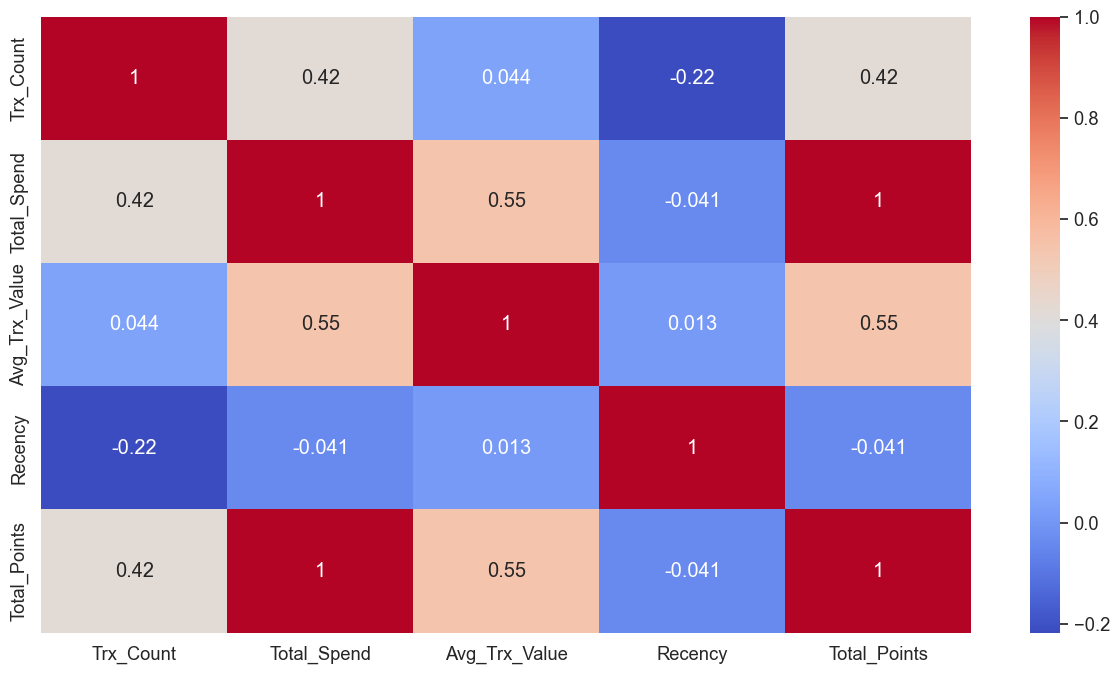

In [28]:
sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm")


In [29]:
# encoding pipeline
cat = ['Top_Merchant_1','Top_Merchant_2','Top_Merchant_3','Top_Merchant_4']

encoder = OneHotEncoder(drop= 'first', sparse_output= False, handle_unknown='ignore')

cat_pipeline = Pipeline(steps= [ ('Encoder', encoder) ])
cat_pipeline


Pipeline(steps=[('Encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [30]:
# transform columns 

preprocessing = ColumnTransformer(transformers= [ ('Num', num_pipeline, num),
                                  ('Cat', cat_pipeline, cat)])
preprocessing


ColumnTransformer(transformers=[('Num',
                                 Pipeline(steps=[('Scaler', StandardScaler())]),
                                 ['Trx_Count', 'Total_Spend', 'Avg_Trx_Value',
                                  'Recency', 'Total_Points']),
                                ('Cat',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Top_Merchant_1', 'Top_Merchant_2',
                                  'Top_Merchant_3', 'Top_Merchant_4'])])

In [31]:
# build our clustering model and test different k (using inertia to determine range)
inertia = list()
krange = range(2 , 25)

for k in krange:
    model = Pipeline(steps= [ ('Preprocessing', preprocessing),
                            ('Model', KMeans(n_clusters=k, random_state=42)) ])
    
    model.fit(X)
    X_num = model.named_steps['Preprocessing'].transform(X) 

    inertia.append(model.named_steps["Model"].inertia_)


c:\Anaconda\envs\my_ML_env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [32]:
px.line(x=krange,y=inertia)     # elbow k= 8 

### Let's Run again in a range closer to elbow k=8 so 4-12 (after k=12 inertia barely improves and 4 is the first slight bend)

In [33]:
# build our clustering model and test different k 
inertia = list()
silhouette = list()
krange = range(4, 13)

for k in krange:
    model = Pipeline(steps= [ ('Preprocessing', preprocessing),
                            ('Model', KMeans(n_clusters=k, random_state=42)) ])
    
    model.fit(X)
    X_num = model.named_steps['Preprocessing'].transform(X) 

    inertia.append(model.named_steps["Model"].inertia_)
    silhouette.append(silhouette_score(X_num, model.named_steps["Model"].labels_))


In [34]:
px.line(x=krange,y=inertia)     # elbow k= 8 

In [35]:
px.line(x=krange, y =silhouette)   # highest k=12

In [36]:
# Choose the k with the highest silhouette score (non graph way)
best_k = krange[np.argmax(silhouette)]
print(f"Best number of clusters based on silhouette score: {best_k}")    # highest k=12

Best number of clusters based on silhouette score: 12


### Based on both scores we will choose k=8 as our optimal k (after 8 we can separate customers into more and smaller clusters but it isn't very meaningful)

### Using k=8 created a few small clusters, so we will slightly reduce it to be more meaningful while still remaining optimal (k=12 would be out of question here)

### Our final k=7 (more meaningful clusters while still being optimal)

## Final Model

In [37]:
final_model = Pipeline(steps= [ ('Preprocessing', preprocessing),
                        ('Model', KMeans(n_clusters=7, random_state=42)) ])

final_model.fit(X)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['Trx_Count', 'Total_Spend',
                                                   'Avg_Trx_Value', 'Recency',
                                                   'Total_Points']),
                                                 ('Cat',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Top_Merchant_1',
                                                   'Top_Merchant_2',
                                                   'Top_Merchant_3',
                                                   'Top_Merchant_4'])])),
                ('Model', KMeans(n_clusters=7, random_state=42))])

In [38]:
df["Cluster"]= final_model.predict(X)       # map clusters back with IDs

In [39]:
print(df.groupby('Cluster')[num].mean())            # take a quick look at each cluster and its averages


         Trx_Count    Total_Spend  Avg_Trx_Value     Recency  Total_Points
Cluster                                                                   
0         1.091935     214.240000     199.570292  277.596169  2.142400e+03
1         1.808586    1763.670584    1041.472684  144.011260  1.763671e+04
2         1.317060     294.667973     238.660779   55.785983  2.946680e+03
3        29.000000  165183.800000    5695.993103   74.000000  1.651838e+06
4         5.147316    1778.481398     330.413766   80.202247  1.778481e+04
5         1.177187    3082.575526    2508.096391  232.062016  3.082576e+04
6         1.043086     205.994658     199.723758  251.129257  2.059947e+03


In [40]:
df['Cluster'].value_counts()            # check how many customers each cluster includes
                                        # remove the one-person cluster


Cluster
2    14625
6    10746
0     4960
1     1421
5      903
4      801
3        1
Name: count, dtype: int64

In [41]:
df  

User_Id  Trx_Count  Total_Spend  Avg_Trx_Value  Recency  Total_Points  \
0            0          1        442.7     442.700000      281          4427   
1            1          1        249.0     249.000000       34          2490   
2            2          1        300.0     300.000000      236          3000   
3            3          1        162.0     162.000000      320          1620   
4            4          1         70.0      70.000000      407           700   
...        ...        ...          ...            ...      ...           ...   
33452    33514          3        594.0     198.000000      101          5940   
33453    33515          1         48.0      48.000000      244           480   
33454    33516          1        132.0     132.000000      256          1320   
33455    33517          1        210.0     210.000000       13          2100   
33456    33518          3        568.0     189.333333       55          5680   

      Top_Merchant_1 Top_Merchant_2 Top_Merchant_3 Top_Merchant_4  Cluster  
0                F&B        Unknown        Unknown        Unknown        0  
1            Fashion        Unknown        Unknown        Unknown        2  
2                F&B        Unknown        Unknown        Unknown        0  
3            Fashion        Unknown        Unknown        Unknown        0  
4            Grocery        Unknown        Unknown        Unknown        6  
...              ...            ...            ...            ...      ...  
33452        Grocery        Unknown        Unknown        Unknown        2  
33453            F&B        Unknown        Unknown        Unknown        0  
33454        Grocery        Unknown        Unknown        Unknown        6  
33455        Grocery        Unknown        Unknown        Unknown        2  
33456        Grocery            F&B        Unknown        Unknown        2  

[33457 rows x 11 columns]

In [42]:
cluster_count = df['Cluster'].value_counts()
tiny_clusters = cluster_count[cluster_count < 2].index.tolist()

df = df[~df['Cluster'].isin(tiny_clusters)].copy()
df = df.reset_index(drop=True)   # after removing the customer

df['Cluster'].value_counts()


Cluster
2    14625
6    10746
0     4960
1     1421
5      903
4      801
Name: count, dtype: int64

In [43]:
# renumber clusters
'''clusters = sorted(df['Cluster'].unique())
new_num = range(len(clusters))
mapping = dict(zip(clusters, new_num))

df['Cluster'] = df['Cluster'].map(mapping)

print(df['Cluster'].value_counts())'''


"clusters = sorted(df['Cluster'].unique())\nnew_num = range(len(clusters))\nmapping = dict(zip(clusters, new_num))\n\ndf['Cluster'] = df['Cluster'].map(mapping)\n\nprint(df['Cluster'].value_counts())"

## Refit model with same k since it's only one person 

In [44]:
X = df.drop(columns=["User_Id", "Cluster"])    # redfine X after dropping column

In [45]:
final_model = Pipeline(steps= [ ('Preprocessing', preprocessing),
                        ('Model', KMeans(n_clusters=7, random_state=42)) ])

final_model.fit(X)


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['Trx_Count', 'Total_Spend',
                                                   'Avg_Trx_Value', 'Recency',
                                                   'Total_Points']),
                                                 ('Cat',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Top_Merchant_1',
                                                   'Top_Merchant_2',
                                                   'Top_Merchant_3',
                                                   'Top_Merchant_4'])])),
                ('Model', KMeans(n_clusters=7, random_state=42))])

In [46]:
df["Cluster"]= final_model.predict(X)       # map clusters back with IDs

In [47]:
df['Cluster'].value_counts()            # check how many customers each cluster includes


Cluster
1    11462
4    10452
0     4813
6     4495
2     1456
5      762
3       16
Name: count, dtype: int64

In [48]:
print(df.groupby('Cluster')[num].mean())            # take a quick look at each cluster and its averages


         Trx_Count   Total_Spend  Avg_Trx_Value     Recency   Total_Points
Cluster                                                                   
0         1.070434    214.032246     202.316549  281.322252    2140.322460
1         1.000000    279.340752     279.340752   59.957512    2793.407521
2         1.342033   2491.181731    2008.738892  213.731456   24911.817308
3         9.500000  28596.356250    4363.933050   30.312500  285963.562500
4         1.034252    211.610945     205.975236  254.446613    2116.109453
5         4.813648   2294.091339     538.255794  117.673228   22940.913386
6         2.323693    450.183515     200.848746   59.567964    4501.835150


In [49]:
df

User_Id  Trx_Count  Total_Spend  Avg_Trx_Value  Recency  Total_Points  \
0            0          1        442.7     442.700000      281          4427   
1            1          1        249.0     249.000000       34          2490   
2            2          1        300.0     300.000000      236          3000   
3            3          1        162.0     162.000000      320          1620   
4            4          1         70.0      70.000000      407           700   
...        ...        ...          ...            ...      ...           ...   
33451    33514          3        594.0     198.000000      101          5940   
33452    33515          1         48.0      48.000000      244           480   
33453    33516          1        132.0     132.000000      256          1320   
33454    33517          1        210.0     210.000000       13          2100   
33455    33518          3        568.0     189.333333       55          5680   

      Top_Merchant_1 Top_Merchant_2 Top_Merchant_3 Top_Merchant_4  Cluster  
0                F&B        Unknown        Unknown        Unknown        0  
1            Fashion        Unknown        Unknown        Unknown        1  
2                F&B        Unknown        Unknown        Unknown        0  
3            Fashion        Unknown        Unknown        Unknown        0  
4            Grocery        Unknown        Unknown        Unknown        4  
...              ...            ...            ...            ...      ...  
33451        Grocery        Unknown        Unknown        Unknown        6  
33452            F&B        Unknown        Unknown        Unknown        0  
33453        Grocery        Unknown        Unknown        Unknown        4  
33454        Grocery        Unknown        Unknown        Unknown        1  
33455        Grocery            F&B        Unknown        Unknown        6  

[33456 rows x 11 columns]

# Further Analysis/ Cluster Analysis

## 1. Cluster Sizes

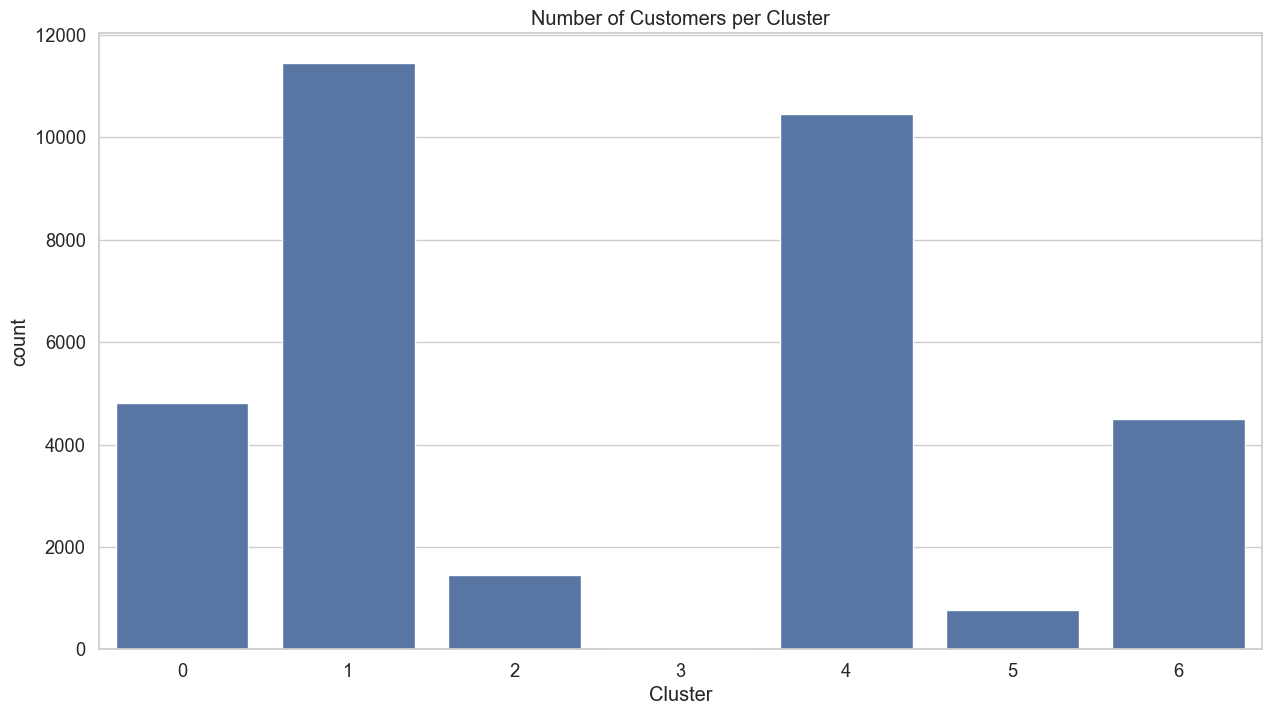

In [50]:
sns.countplot(data=df, x='Cluster', order=sorted(df['Cluster'].unique()))
plt.title("Number of Customers per Cluster")
plt.show()

## 2. Total Spending vs Recency per Cluster

In [51]:
px.scatter(df, x='Recency', y='Total_Spend', color=df['Cluster'].astype(str), hover_data=['User_Id','Trx_Count','Avg_Trx_Value'],
    title='Total Spend vs Recency by Cluster', color_discrete_sequence=px.colors.qualitative.G10)

## 3. Average Transaction Value Distribution per Cluster (Outliers)

In [52]:
px.box(df, x='Cluster', y='Avg_Trx_Value', color='Cluster',
    title='Average Transaction Value per Cluster', color_discrete_sequence=px.colors.qualitative.G10)

## 4. Total Spend Distribution per Cluster (Outliers)

In [53]:
px.box(df, x='Cluster', y='Total_Spend', color='Cluster',
    title='Average Transaction Value per Cluster', color_discrete_sequence=px.colors.qualitative.G10)

## 5. Top Merchants per Cluster

In [54]:
merchants_melted = df.melt(id_vars=['User_Id','Cluster'],
    value_vars=['Top_Merchant_1','Top_Merchant_2','Top_Merchant_3','Top_Merchant_4'],
    value_name='Merchant')

merchant_counts = (merchants_melted.groupby(['Cluster','Merchant']).size().reset_index(name='Count'))

merchant_counts

Cluster         Merchant  Count
0         0      Electronics     68
1         0              F&B   3123
2         0          Fashion   1062
3         0          Grocery     78
4         0  Health & Beauty    497
5         0            Other      7
6         0    Transportaion     69
7         0          Unknown  14348
8         1      Electronics     41
9         1              F&B   1331
10        1          Fashion   1008
11        1          Grocery   8751
12        1  Health & Beauty    279
13        1            Other      9
14        1    Transportaion     43
15        1          Unknown  34386
16        2      Electronics     40
17        2              F&B    231
18        2          Fashion    249
19        2          Grocery    996
20        2  Health & Beauty     35
21        2            Other      1
22        2    Transportaion     10
23        2          Unknown   4262
24        3      Electronics      2
25        3              F&B      6
26        3          Fashion      2
27        3          Grocery     15
28        3  Health & Beauty      1
29        3          Unknown     38
30        4              F&B     23
31        4          Fashion      8
32        4          Grocery  10452
33        4  Health & Beauty      1
34        4          Unknown  31324
35        5      Electronics      9
36        5              F&B    355
37        5          Fashion    154
38        5          Grocery    581
39        5  Health & Beauty     64
40        5            Other     11
41        5    Transportaion      5
42        5          Unknown   1869
43        6      Electronics     25
44        6              F&B   1029
45        6          Fashion    419
46        6          Grocery   3696
47        6  Health & Beauty    303
48        6            Other      9
49        6    Transportaion     10
50        6          Unknown  12489

In [55]:
px.bar(merchant_counts,x='Cluster', y='Count', color='Merchant',barmode='group',text='Merchant',
    title='Top Merchants per Cluster', color_discrete_sequence=px.colors.qualitative.G10, width=1300, height=600)

## 6. Total Spend per Cluster

In [56]:
total_spend = df.groupby('Cluster')['Total_Spend'].sum().reset_index()
total_spend

Cluster  Total_Spend
0        0    1030137.2
1        1    3201803.7
2        2    3627160.6
3        3     457541.7
4        4    2211757.6
5        5    1748097.6
6        6    2023574.9

In [57]:
px.bar(total_spend, x='Cluster', y='Total_Spend', text='Total_Spend', text_auto=True,
    title='Total Spend per Cluster', labels={'Total_Spend':'Total Spend', 'Cluster':'Cluster'})

## 7. Average Transaction Value per Cluster

In [58]:
avg_trx = df.groupby('Cluster')['Avg_Trx_Value'].mean().reset_index()
avg_trx

Cluster  Avg_Trx_Value
0        0     202.316549
1        1     279.340752
2        2    2008.738892
3        3    4363.933050
4        4     205.975236
5        5     538.255794
6        6     200.848746

In [59]:
px.bar(avg_trx, x='Cluster', y='Avg_Trx_Value', text='Avg_Trx_Value', text_auto=True,
    title='Average Transaction Value per Cluster',labels={'Avg_Trx_Value':'Average Transaction Value', 'Cluster':'Cluster'})

## 8. Recency Distribution per Cluster

In [60]:
px.box( df, x='Cluster', y='Recency', color='Cluster', title='Recency Distribution per Cluster')

## 9. Recency vs Transaction Count (Loyalty Indicator)

In [61]:
px.scatter(df, x='Recency', y='Trx_Count', color=df['Cluster'].astype(str), hover_data=['User_Id','Total_Spend'],
    title='Recency vs Transaction Count per Cluster', color_discrete_sequence=px.colors.qualitative.G10)

## Let's save our dataframe before naming our clusters

In [62]:
df.to_parquet("../Data/merged/merged_customer_df.parquet")

# Adjusting Cluster names based on our Analysis

### Clusters 4 and 6 are the worst while 2 and 3 are the best. Customers in cluster 3 have both high average transaction value and total spending. However, those in cluster 2 have a high total spend but a low transaction count, so they engage less occassionally than those in cluster 2. Those in cluster 1 have the lowest recency, while those in cluster 5 engage regularly and are active in general.

In [63]:
cluster_names = {
    0: "Occasional Low-Value",   # High recency, low spend
    1: "New / Recent",           # Low recency, single transaction
    2: "High-Value Occasional",  # High spend, lower frequency
    3: "Premium / VIP",          # Extreme high spend & frequency
    4: "Dormant / Low-Value",    # High recency, low spend
    5: "Regular Engaged",        # High frequency, solid spend
    6: "Active Low-Value"        # Low recency, multiple low-spend visits
}

df['Cluster_Name'] = df['Cluster'].map(cluster_names)
df

User_Id  Trx_Count  Total_Spend  Avg_Trx_Value  Recency  Total_Points  \
0            0          1        442.7     442.700000      281          4427   
1            1          1        249.0     249.000000       34          2490   
2            2          1        300.0     300.000000      236          3000   
3            3          1        162.0     162.000000      320          1620   
4            4          1         70.0      70.000000      407           700   
...        ...        ...          ...            ...      ...           ...   
33451    33514          3        594.0     198.000000      101          5940   
33452    33515          1         48.0      48.000000      244           480   
33453    33516          1        132.0     132.000000      256          1320   
33454    33517          1        210.0     210.000000       13          2100   
33455    33518          3        568.0     189.333333       55          5680   

      Top_Merchant_1 Top_Merchant_2 Top_Merchant_3 Top_Merchant_4  Cluster  \
0                F&B        Unknown        Unknown        Unknown        0   
1            Fashion        Unknown        Unknown        Unknown        1   
2                F&B        Unknown        Unknown        Unknown        0   
3            Fashion        Unknown        Unknown        Unknown        0   
4            Grocery        Unknown        Unknown        Unknown        4   
...              ...            ...            ...            ...      ...   
33451        Grocery        Unknown        Unknown        Unknown        6   
33452            F&B        Unknown        Unknown        Unknown        0   
33453        Grocery        Unknown        Unknown        Unknown        4   
33454        Grocery        Unknown        Unknown        Unknown        1   
33455        Grocery            F&B        Unknown        Unknown        6   

               Cluster_Name  
0      Occasional Low-Value  
1              New / Recent  
2      Occasional Low-Value  
3      Occasional Low-Value  
4       Dormant / Low-Value  
...                     ...  
33451      Active Low-Value  
33452  Occasional Low-Value  
33453   Dormant / Low-Value  
33454          New / Recent  
33455      Active Low-Value  

[33456 rows x 12 columns]

## Now Let's Save our Final Dataframe with clusters and their names along with our final model decided above (k=7)

In [65]:
df.to_parquet("../Data/clustered/final_clustered_customer_df.parquet")

In [67]:
joblib.dump(final_model, "../Models/kmeans_customer_model.pkl")

['../Models/kmeans_customer_model.pkl']

# End of Notebook